In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Exercise 1: Understanding Your Dataset**

In [2]:
#Question 1

df = pd.read_csv("processedClevelandData.csv", sep = ";") #Used proper separator
df.head()

,id,Age,Sex,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,ca,thal,num
0,1,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,3.0,0.0,6.0,0
1,2,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,2.0,3.0,3.0,1
2,3,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.0,2.0,7.0,1
3,4,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.0,0.0,3.0,0
4,5,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.0,0.0,3.0,0


In [3]:
df.isna().sum() #Checking missing values

id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
resetecg    0
thalach     0
exang       0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [4]:
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 0


In [5]:
#Replacing the "?" values in ca and thal with the mode
df['ca'] = df['ca'].replace(['?'], df['ca'].mode())
df['thal'] = df['thal'].replace(['?'], df['thal'].mode())

In [6]:
#Question 2
summaryDfBP = pd.DataFrame(
    [val, round(np.mean(df[df.num == val].trestbps)),
     round(np.median(df[df.num == val].trestbps)),
     round(np.std(df[df.num == val].trestbps))]
    for val in np.unique(df.num)
)
summaryDfBP.columns = ['typeOfDiagnosis', 'mean', 'median', 'std']
summaryDfBP

,typeOfDiagnosis,mean,median,std
0,0,129,130,16
1,1,135,130,19


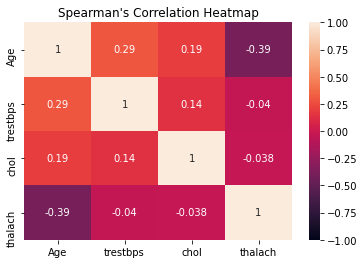

In [7]:
#Question 3
spearman_corr = df[['Age', 'trestbps','chol','thalach']].corr(method = "spearman")
spearman_heatmap = sns.heatmap(spearman_corr,vmin=-1, vmax=1,annot=True)
spearman_heatmap.set_title('Spearman\'s Correlation Heatmap')
plt.show()

Age is most correlated with resting blood pressure. Spearman's correlation coefficient: 0.29

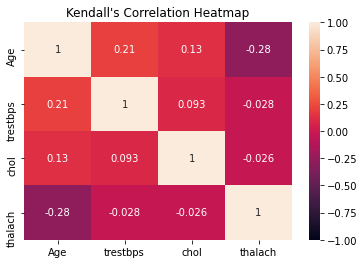

In [8]:
kendall_corr = df[['Age', 'trestbps','chol','thalach']].corr(method = "kendall")
kendall_heatmap = sns.heatmap(kendall_corr,vmin=-1, vmax=1,annot=True)
kendall_heatmap.set_title('Kendall\'s Correlation Heatmap')
plt.show()

Age is most correlated with resting blood pressure. Kendall's correlation coefficient: 0.21

**Question 4:**

Discrete: sex, cp, fbs, resetecg, exang, slope, thal, ca, num
Continuous: trestbps, chol, thalach

Age is considered a discrete variable if only the number of years is counted, or continuous if measured as a time variable.

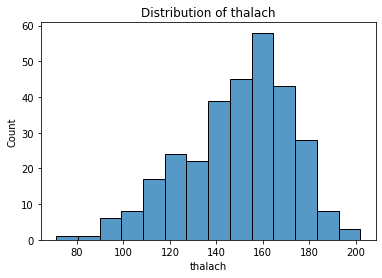

In [9]:
#Question 5
sns.histplot(df["thalach"])
plt.title("Distribution of thalach")
plt.show()

thalach is negative distribution (skewed left)

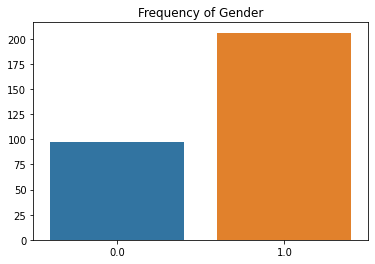

In [10]:
#Question 6
gender = df.Sex.value_counts()
sns.barplot(x=gender.index, y=gender.values)
plt.title("Frequency of Gender")
plt.show()

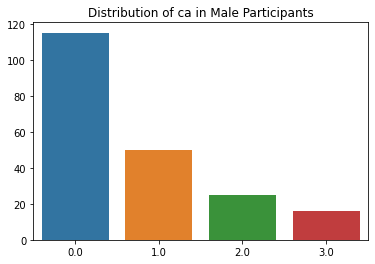

In [11]:
male_df = df.loc[df['Sex']==1]
ca = male_df.ca.value_counts()
sns.barplot(x=ca.index, y=ca.values)
plt.title("Distribution of ca in Male Participants")
plt.show()

In [12]:
#Question 7
from scipy.stats import iqr
def outliers(feature):
    """Calculates the outlier for different features.
    Args:
    feature: features for which the outliers needs to be computed.
    Returns:
    The indices of the outliers.
    """
    sns.boxplot(x=df[feature])
    plt.show()
    q1, q3= np.percentile(df[feature],[25,75])
    lower_bound = q1 -(1.5 * iqr(df[feature])) 
    upper_bound = q3 +(1.5 * iqr(df[feature])) 
    print(lower_bound, upper_bound)
    indices = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound))
    return indices

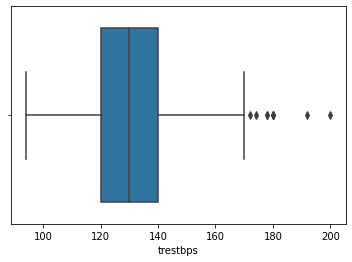

90.0 170.0


(array([ 14,  83, 126, 172, 183, 188, 201, 213, 231]),)

In [13]:
outliers('trestbps')

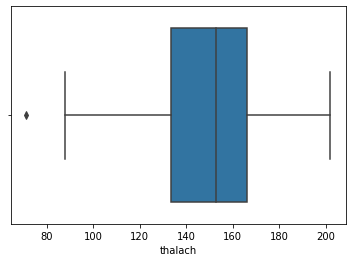

84.75 214.75


(array([245]),)

In [14]:
outliers('thalach')

## **Exercise 2 - Probability (total: 4 points)** 

### **2.1** Suppose a discrete random variable, MMSE (Mini mental state examination), cognitive test measured for Alzheimer’s disease (AD) has the following probability mass function:

### Find the probability that MMSE:
  
####  a) at least 22 (1 point)
  
####  b) at least 14 and at most 28 (1 point)

a)
p(X>=22) = p(22) + p(14) + p(8) + p(5) = 0.17 + 0.16 + 0.27 + 0.05 = 0.65

b) 
p(14<=X<=28) =  p(14) + p(22) + p(24) + p(28) = 0.16 + 0.17 + 0.3 + 0.12 = 0.75

### **2.2** A company produced antibody testing kits for COVID-19. The false positive rate of the test is known to be 3%. What is the probability to find at least 2 false positive results within 35 tested patients? (2 points)


**Binomial coefficient**

Probability mass function:

$$Bin(n|k,p) = \binom{n}{k}p^k(1-p)^{n-k}$$


$$\binom{n}{k} = \frac{n!}{(n - k)!k!}$$


$k = 1, n = 35, p = 0.03$

$$P(no false positive) = (1 - 0.03)^{35} =  0.344$$

$$P(one false postive) = (35!/(35-1)!1!) * 0.03^{1} * (1-0.03)^{34} = 35 * 0.03 * (1-0.03)^{34} = 0.373$$

$$P(at least two false positives) = 1 - P(no false positives) - P(one false positive) = 1 - 0.344 - 0.373 = 0.283$$

## Exercise 3 - Hypothesis Testing (total: 8 points)

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
from itertools import combinations

### Are all the criteria for carrying out a t-test to identify a significant difference in the age of patients who have heart disease and those who don’t, met? (3 points)


#### If criteria is not met, point out the unmet conditions for the variables, and mention a possible solution in-order to combat this issue. 

* No, the age feature is not normally distributed. This can be tested for using either Shapiro-Wilk's test (as shown in the code cell below) or by plotting the distribution of the feature
* There are multiple solutions to combat this issue, namely:
  1. Using a non-parametric hypothesis test, such as Mann-Whitney U test
  0. A creative solution to the problem is to take the logarithm of the 2 groups (with heart disease, and without) and carry out the t-test on the log-transformed values

**Note - If you were to take the logarithm, you need to still make sure that the 2 groups have equal variances (take a look at Levene's test)** 

In [16]:
# Split the age feature into 2 groups
heart_disease = df[df['num'] == 1]['Age'].copy()
normal = df[df['num'] == 0]['Age'].copy()

# Shapiro-Wilks test
stat, pval = sp.stats.shapiro(heart_disease)
print(f"Shapiro test for patients with heart disease:\n\tStatistic: {stat} & P-Value: {pval}\n")

stat, pval = sp.stats.shapiro(normal)
print(f"Shapiro test for normal patients:\n\tStatistic: {stat} & P-Value: {pval}")

Shapiro test for patients with heart disease:
	Statistic: 0.9677355885505676 & P-Value: 0.002255889819934964

Shapiro test for normal patients:
	Statistic: 0.9870028495788574 & P-Value: 0.1320628970861435


The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution. And as the p-value for the normal patients is not significant, a normal distribution cannot be assumed. Due to which we must carry out a different test or a data transformation step to account for it.

In order to account for the non-normality we will now take the logarithm of the age feature for the 2 groups.

In [17]:
# Levene's test to test equality of variance between the 2 groups
levene_result = sp.stats.levene(np.log(heart_disease), np.log(normal))
print(f"Levene's test:\n\tStatistic: {levene_result.statistic}, P-Value: {levene_result.pvalue}\n")

# T-Test
t_test = sp.stats.ttest_ind(np.log(heart_disease), np.log(normal), equal_var = True)   
print(f"T-Test of log transformed values:\n\t Statistic: {t_test.statistic}, P-Value: {t_test.pvalue}")

Levene's test:
	Statistic: 10.64895386190539, P-Value: 0.0012280952241828288

T-Test of log transformed values:
	 Statistic: 4.09425064523287, P-Value: 5.447049903915471e-05


### Identify if women are significantly more likely to get heart disease than men? (2 points)

In [18]:
# Generate a contingency table
tab = pd.crosstab(df['num'], df['Sex'])

# Carry out Fisher's exact test
odds, pvalue = sp.stats.fisher_exact(tab)
print(f"Fisher's exact test:\n\tOdds of women being more prone to heart disease than men: {odds:.3},\n\tP-Value: {pvalue}")

Fisher's exact test:
	Odds of women being more prone to heart disease than men: 3.57,
	P-Value: 1.2589439001519399e-06


Using Fisher's exact test, we can identify that the Sex variable has some association with the possiblity of development of heart disease.

In order to identify if women are more like to get heart disease or not we must look at the distribution of the data.

<AxesSubplot:xlabel='Sex', ylabel='count'>

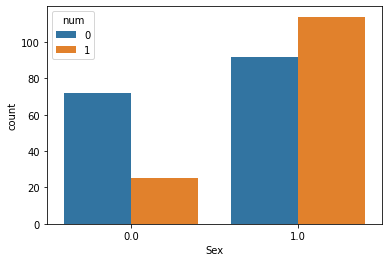

In [19]:
sns.countplot(data=df, x="Sex", hue="num")

This distribution of the data shows us that men are more likely to get heart disease than men.

### And using χ²−test, identify if there is a significant association between exercise induced angina (exang), and the slope of the peak exercise ST segment (slope)? (3 points)

Similar to Fisher's test, χ²−test is also a test on categorical variables. But χ²−test is only an approximation and not an "exact" test to identify the association between 2 variables.

In [20]:
# Generate a contingency table for slope and exercise induced angina
tab = pd.crosstab(df['exang'], df['slope'])

# Carry out Chi-Square test to identif the association
chi, pvalue, dof, expected = sp.stats.chi2_contingency(tab)
print(f"Chi square test:\n\tChi: {chi}\n\tPvalue: {pvalue}")

Chi square test:
	Chi: 25.131165603245137
	Pvalue: 3.490090811425977e-06


It can be see that there is definitely an association between the exercise induced angina and the slope of the peak exercise ST segment. 